# **Trabalhando com Planilhas do Excel**  



### As planilhas que iremos trabalhar simulam as vendas de algumas cidades. 

### Sendo elas:

 - Aracaju
 - Fortaleza
 - Natal
 - Recife
 - Salvador

In [ ]:
#Importando a biblioteca

import pandas as pd

In [ ]:
# Leitura dos arquivos

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

# obs.: apóso o pd.read eu vou usar _ mais o tipo de arquivo que no caso é excel

In [ ]:
# caso queira ver os dados basta usar a variavel referente juntamente com .head()
# ex.:

df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Vamos juntar todos os arquivos para trabalhar com todas as cidades em um só arquivo
# Vamos criar a variavel df e concatenar todos os arquivos juntos

df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# Vamos apresentar as 5 primeiras linhas

df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Vamos ver as 5 ultimas linhas

df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Digamos que quero a amostra aleatoria de 5 linhas do conjunto todo
# caso queira mais de cinco basta estabelece o paramentro com o numero desejado

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
92,Natal,2019-01-02,4.57,1035,1
207,Salvador,2019-01-02,46.70,1036,2
48,Aracaju,2018-01-01,35.90,1521,8
112,Natal,2019-01-02,43.00,1036,3
116,Salvador,2019-03-02,41.78,1034,3


In [ ]:
# Verificando o tipo de dados de cada coluna

df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Alterando o tipo de dado de uma determinada coluna
# Nesse caso vamos pegar exemplo da coluna LojaID poruqe mesmo sendo numero a gente não ira realizar nenhum calculo

df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


###  **--> Tratando valores faltantes**



In [ ]:
# Consultando linhas com valores faltantes ou nulos

df.isnull().sum()     # aqui ele me retornara os valos nulos se tiver e a soma deles

Cidade    0
Data      0
Vendas    6
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Caso tenha valores nulos podemos apagar, substituir ou deixar zero
# Vamos simular na voluna vendas

# 1 caso - substituir pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

#inplace é para substituir em memoria
# Dessa forma onde tiver valor nulo faltante ele ira substituir pela media

In [ ]:
# para saber qual a media ele usou para prencher essas faltas

df["Vendas"].mean()

122.7610472972973

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# 2 caso - deixar os nulos tudo zero

df["Vendas"].fillna(0, inplace=True)

In [ ]:
# 3 caso - Apagar as linhas nulas

df.dropna(inplace = True)

In [ ]:
# Podemos apagar tambem as linhas com valores nulos com base apenas em 1 coluna 

df.dropna(subset = ["Vendas"], inplace=True)

In [ ]:
# Removendo linhas que estejam com valores faltantes em todas as colunas

df.dropna(how="all", inplace=True)

## **-->Criando colunas novas**



In [ ]:
# Vamos criar uma coluna de Receita que é o que o nosso chefe precisa ver

df["Receita"] = df["Vendas"].mul(df["Qtde"])

# Aqui vamos criar a coluna receita multiplicando vendas por quantidade

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# OBS.: Se a gente não tivesse a coluna quantidade para achar esses valores poderiamos fazer da seguinte forma

df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
# Retornando a maior receita

df["Receita"].max()

3544.0

In [ ]:
# Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
# Agora queremos identificar a loja
#1 caso:

# Vamos usar o nlargest - que vamos ter o retorno das linhas com maiores receitas
df.nlargest(5, "Receita")

# Podemos passar o parametro de quantas linhas queremos ver, nesse caso passei 5

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


In [ ]:
# 2 caso:

# Vamos usar o nlargest - que vamos ter o retorno das linhas com menores receitas
df.nsmallest(5, "Receita")

# Podemos passar o parametro de quantas linhas queremos ver, nesse caso passei 5

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0


In [ ]:
# Vamos fazer um agrupamento por cidade e ver a receita por cidade

df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando o conjunto de dados

df.sort_values("Receita", ascending=False).head(10)     #Nesse caso vamos ordenar pela receita
                                                        #Do maior para o menor usando "ascending = False"
                                                        #Vamos ler 10 linhas com "head"

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### **--> Trabalhando com datas** 📆

In [ ]:
# Transformando a coluna de data em tipo inteiro
# Vamos fazer isso para simular uma situação que você pegue sua tabela de datas como inteira na empresa

df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
# Agora precisamos transformar essa coluna de data para o formato data para podermos trabalhar

df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
# Queremos saber a Receita por ano

df.groupby(df["Data"].dt.year)["Receita"].sum()


# Aqui agrupamos nossa coluna datas e pedimos que ele extraia apenas o ano da minha data 
# e passe a soma da receita por ano

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Vamos criar uma nova coluna com o ano

df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
156,Salvador,2019-01-02,36.14,1037,3,108.42,3.0,2019
225,Salvador,2019-01-02,36.23,1035,1,36.23,1.0,2019
31,Aracaju,2018-01-01,171.16,1520,9,1540.44,9.0,2018
95,Aracaju,2018-01-01,127.43,1522,9,1146.87,9.0,2018
150,Natal,2019-01-02,11.13,1035,2,22.26,2.0,2019


In [ ]:
# Como extrair o mes e o dia da venda

df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

# Vamos criar uma coluna de mes venda e uma do dia venda extraindo da coluna data

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
18,Fortaleza,2019-01-01,38.31,1002,3,114.93,3.0,2019,1,1
168,Natal,2019-01-02,20.22,1036,1,20.22,1.0,2019,1,2
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1
105,Salvador,2019-01-01,32.83,1037,1,32.83,1.0,2019,1,1
208,Salvador,2019-01-02,39.40,1036,3,118.20,3.0,2019,1,2


In [ ]:
# Retornando a data mais antiga

df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferença de dias

df["diferenca_dias"] = df["Data"] - df["Data"].min()

# Como não temos duas colunas de datas vamos criar uma colina diferença de dias que vai receber nossa coluna de datas subtraida da data min

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
66,Natal,2019-03-24,559.00,853,2,1118.00,2.0,2019,3,24,447 days
41,Natal,2018-05-20,835.00,852,4,3340.00,4.0,2018,5,20,139 days
23,Recife,2019-01-01,37.51,982,2,75.02,2.0,2019,1,1,365 days
150,Salvador,2019-01-02,11.13,1035,2,22.26,2.0,2019,1,2,366 days
31,Salvador,2019-01-01,202.25,1035,2,404.50,2.0,2019,1,1,365 days


In [ ]:
# Criando a coluna de trimestre 

df["Trimestre_Venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,Trimestre_Venda
129,Aracaju,2018-01-01,13.70,1522,6,82.20,6.0,2018,1,1,0 days,1
210,Natal,2019-01-02,197.64,1035,1,197.64,1.0,2019,1,2,366 days,1
51,Aracaju,2018-01-01,40.58,1522,6,243.48,6.0,2018,1,1,0 days,1
55,Recife,2019-01-01,20.03,983,4,80.12,4.0,2019,1,1,365 days,1
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2.0,2019,1,1,365 days,1


In [ ]:
# Filtrando as vendas de 2019 do mês de março

vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

# Aqui vamos usar o loc para filtrar e retornar todo mundo que esteja em 2019 no mes 3

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,Trimestre_Venda
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2,425 days,1
120,Fortaleza,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2,425 days,1
75,Natal,2019-03-30,706.00,854,2,1412.00,2.0,2019,3,30,453 days,1
118,Salvador,2019-03-02,92.21,1035,2,184.42,2.0,2019,3,2,425 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
69,Natal,2019-03-24,817.00,852,4,3268.00,4.0,2019,3,24,447 days,1
117,Salvador,2019-03-02,39.41,1034,1,39.41,1.0,2019,3,2,425 days,1
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1


## **--> Visualizaçao de dados** 

In [ ]:
# Usando o comando value_counts

# Esse metodo faz uma contagem de forma que nos mostra quantas linhas temos com cada  item de nossos dados
# Nesse caso ele nos mostra quantas linhas cada loja tem que representa a quantidade de vendas dessa loja
# a função ascending=False nos permite ver do maior para o menor

df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

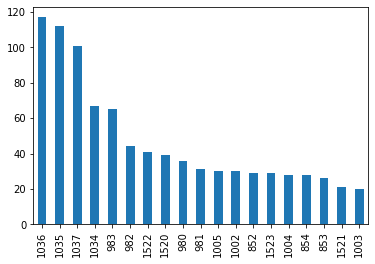

In [ ]:
# Como mostrar essa informação em um grafico

# Vamos trabalhar com a biblioteca matplotlib que é totalmente integrada a biblioteca Pandas

df["LojaID"].value_counts(ascending=False).plot.bar()

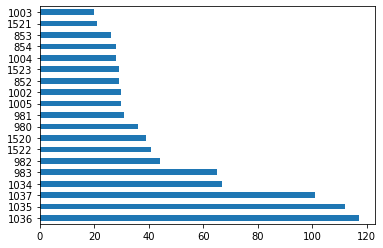

In [ ]:
# Criando grafico de barras horizontais

df["LojaID"].value_counts().plot.barh()

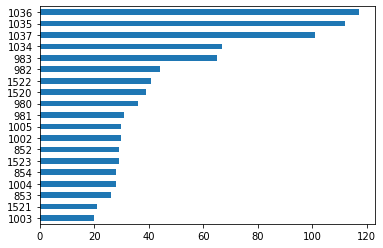

In [ ]:
# Mais dessa vez ele não veio do maior para o menor, para isso vamos colocar True no lugar de False do ascending

df["LojaID"].value_counts(ascending=True).plot.barh()

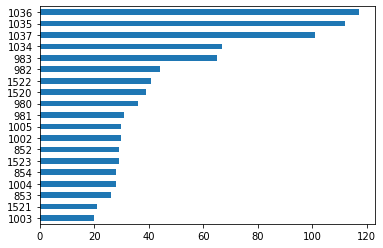

In [ ]:
# Para tirar a linha de cima do grafico basta passar um ";" no final do codigo
df["LojaID"].value_counts(ascending=True).plot.barh();

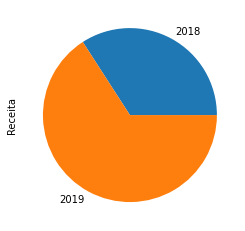

In [ ]:
# Grafico de Pizza
# mostrando a receita por ano 

df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
# Total de vendas por cidade

df["Cidade"].value_counts(ascending=False)

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

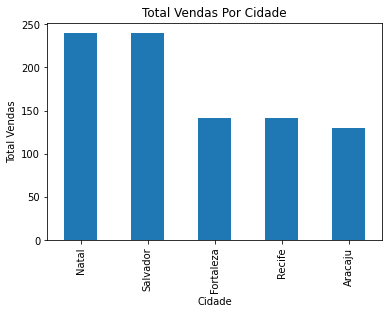

In [ ]:
# Adicionando um título e alterando o nome dos eixos

import matplotlib.pyplot as plt                                               #Importamos a matplotlib como plt para usar o plt x e y para alterar o nome dos eixos
df["Cidade"].value_counts().plot.bar(title="Total Vendas Por Cidade")         #Passamos o parametro no plto.bar para alterar o titulo
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

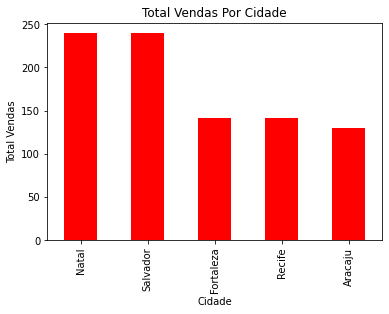

In [ ]:
# Alterando a cor do grafico

df["Cidade"].value_counts().plot.bar(title="Total Vendas Por Cidade", color="red")         
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
# Alterar o estilo
# Para escolher podemos olhar na documentação do matplotlib o nome do grafico que queremos


plt.style.use("ggplot")

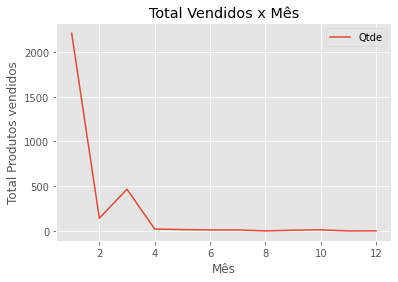

In [ ]:
# Vamos criar um novo grafico para testar o nosso estilo

df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

# Nesse grafico agrupamos o mes de vendas e pegamos a quantidade de produtos vendidos e passamos uma soma

In [ ]:
# Quero a soma da quantidade de produtos vendidos por mês

df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas as vendas de 2019

df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

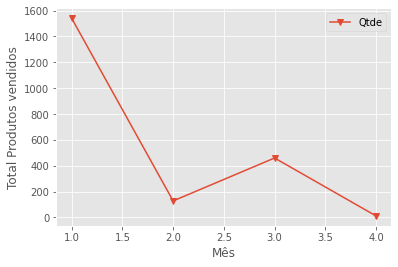

In [ ]:
# Total de produtos vendidos por mes em grafico
# o que muda nesse grafico é o marcador "v" (existe outros marcadores na documentação)

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

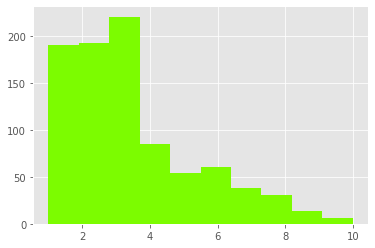

In [ ]:
# Como podemos plotar um grafico de histograma 

plt.hist(df["Qtde"], color = "lawngreen");

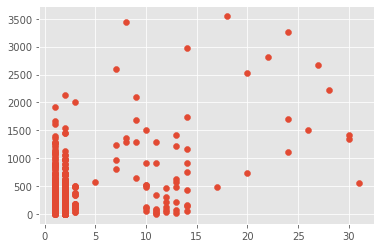

In [ ]:
# Vamos fazer um grafico de disperção

plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

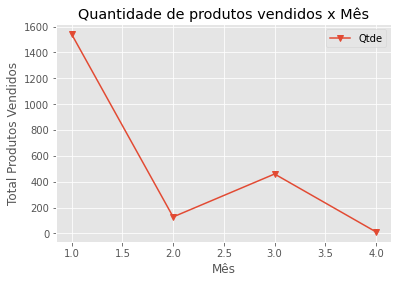

In [ ]:
# Salvando em png

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")                 # savefig é usado para salvar o nosso mapa
                                                      #Usamos o png mais pode ser escolhido qualquer formato para ser salvo